# Assignment 3
(Assignment groups 2 and 10)

- Jasper Bosschart s2562685
- Marina Stefanova s2610604
- Nagham Mekky s3096564
- Sven Sonneveld s2594854
- Hynek Noll s3102181

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from tabulate import tabulate

# Motivation and Goals

# Methodology and Results 
Our goal is to analyze leaked chat logs of a ransomware group Conti.

1) How many total records are in the data?  

In [29]:
file = open('jabber_chat_2021_2022_translated.csv',encoding='utf8')
reader = csv.reader(file)
record_count= len(list(reader))-1
print("Number of records: ", record_count)

Number of records:  60773


2) How many of these records are encrypted and cannot be read?

    Roughly 14374 of the chat log messages, leaving us with about 46.399 of “useful” messages.

3) How many messages are sent originally in Russian, and how many are sent in English?

In [30]:
russian_count = 0
english_count = 0
# Read the data from the csv file
with open('jabber_chat_2021_2022_translated.csv','r',encoding='utf8') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        if (row[6]=='ru'):
            russian_count += 1
        elif (row[6]=='en'):
            english_count += 1
print("Number of Russian messages: ", russian_count)
print("Number of English messages: ", english_count)

Number of Russian messages:  32706
Number of English messages:  4314


In [35]:
dict = {}
with open('jabber_chat_2021_2022_translated.csv','r',encoding='utf8') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for elem in lines:
        if elem[2] not in dict and elem[2] is not "from":
            dict[elem[2]] = 0
        dict[elem[2]] = dict[elem[2]] + 1

final_list = [{'Email address' : elem, 'count': dict[elem]} for elem in dict]
#order list by count
final_list.sort(key=lambda x: x['count'], reverse=True)
print(tabulate(final_list, headers='keys', tablefmt='psql'))
#print (final_list)

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\nagha\AppData\Local\Temp\ipykernel_21596\2948947960.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if elem[2] not in dict and elem[2] is not "from":


+----------------------------------------------------------------------+---------+
| Email address                                                        |   count |
|----------------------------------------------------------------------+---------|
| defender@q3mcco35auwcstmt.onion                                      |    8246 |
| stern@q3mcco35auwcstmt.onion                                         |    4323 |
| driver@q3mcco35auwcstmt.onion                                        |    3968 |
| bio@q3mcco35auwcstmt.onion                                           |    3196 |
| mango@q3mcco35auwcstmt.onion                                         |    3194 |
| ttrr@conference.q3mcco35auwcstmt.onion                               |    3122 |
| veron@q3mcco35auwcstmt.onion                                         |    2955 |
| hof@q3mcco35auwcstmt.onion                                           |    2389 |
| bentley@q3mcco35auwcstmt.onion                                       |    1810 |
| bl

### Questions 4 and 5

4) Who are the top 10 (most important) users?
5) How many messages are sent by each of these users? What is the total?

In [32]:
# Top 10 users and how many messages they sent
top_count = final_list[:10]
names = []
#print (tabulate(top_count, headers='keys', tablefmt='psql'))
total_count_top = 0
for elem in top_count:
    total_count_top += elem['count']
    names.append((elem['Email address'].split('@')[0]))
df = pd.DataFrame({"Names of top 10 users": names, "Messages sent": [elem['count'] for elem in top_count]})
print(df)
print("Total of the top 10 users messages: ", total_count_top)

  Names of top 10 users  Messages sent
0              defender           8246
1                 stern           4323
2                driver           3968
3                   bio           3196
4                 mango           3194
5                  ttrr           3122
6                 veron           2955
7                   hof           2389
8               bentley           1810
9             bloodrush           1798
Total of the top 10 users messages:  35001


### Question 6
What is the average number of messages sent per user?

In [33]:
#Average number of messages per user
total_count=0
for elem in final_list:
    total_count += elem['count']
average = total_count/len(final_list)
print("Average number of messages per user: ", average)


Average number of messages per user:  220.99636363636364


13) Give an example(s) of URLs in the data? And say what are they for. With a graph 

    Graph of websites the count of websites visited with the count being higher than 10

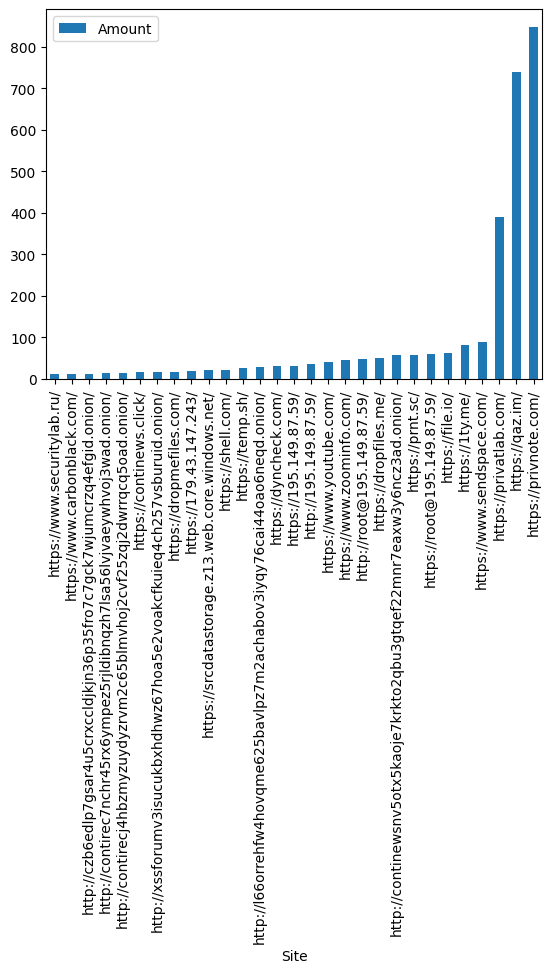

In [39]:
# read the csv file and set ";" to be the seperator
df = pd.read_csv("httpSiteFileCounter.csv", sep=";")

# Set the index to be the site line (the names below the graph)
df.index = df["Site"]

# filter so only sites are shown that have a count of higher than 10, then plot it with a bar graph (.plot() == plotting, .plot.bar() == plot as bar chart)
df[df.Amount > 10].plot.bar()

# Show the chart
plt.show()

# Conclusion and Reflections